# Initialization

In [57]:
import stimulator_calibration_lib as csl
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [58]:
h        = 4.135667E-15 # Planck's constant [eV*s]
c        = 299792458    # speed of light [m/s]
eV_per_J = 6.242E+18    # [eV] per [J]

# Definitions
### Load opsin spectra from file:

As text files with one column per opsin plus one (the last one) for the x-axis, the wavelength. X-scaling is expected to be in 1-nm increments.

In [59]:
x_wavelen_nm = np.loadtxt("mouse_cone_opsins.txt", usecols=(2,)) # 300 .. 699 nm
mouseMOpsin  = np.loadtxt("mouse_cone_opsins.txt", usecols=(1,))
mouseSOpsin  = np.loadtxt("mouse_cone_opsins.txt", usecols=(0,))

### Define photoreceptor- and species specific constants:

*   `ac_um2`<br />
    Cone OS light collection area in [µm^2], see [Nikonov et al., 2006](http://www.ncbi.nlm.nih.gov/pubmed/16567464) for details. This is an experimentally determined value, e.g. for wt mouse cones that is fully dark-adapted, a value of 0.2 can be assumed.
*   `ar_um2`<br />
    Rod OS light collection area, see above. A value of 0.5 is realistic.   


In [60]:
ac_um2 = 0.2     
ar_um2 = 0.5

### Define photoreceptors:

In [61]:
MCone = {"name"           : "mouse M cone",
         "peak_nm"        : 511,
         "collecArea_um2" : ac_um2, 
         "spect"          : mouseMOpsin}
SCone = {"name"           : "mouse S cone",
         "peak_nm"        : 360,         
         "collecArea_um2" : ac_um2, 
         "spect"          : mouseSOpsin}
Rod   = {"name"           : "mouse rod",
         "peak_nm"        : 510,         
         "collecArea_um2" : ar_um2, 
         "spect"          : []}

PRs   = [MCone, SCone, Rod]

###Load Spectra of LEDs and LED filter(s)
Expected to have the same x-scaling as the opsin spectra (i.e. 300-699 nm, in 1-nm increments).

In [62]:
Dichr_UVGreen_name = "F59-003_390_575"
Dichr_UVGreen      = np.loadtxt(Dichr_UVGreen_name +".txt", usecols=(0,))

"""
LED_LCr_name       = "LCr1_LEDs"
LED_UV             = np.loadtxt(LED_LCr_name +".txt", usecols=(2,))
LED_Green          = np.loadtxt(LED_LCr_name +".txt", usecols=(1,))
"""
LED_LCr_name       = "LCr2_LEDs"
LED_UV             = np.loadtxt(LED_LCr_name +".txt", usecols=(2,))
LED_Green          = np.loadtxt(LED_LCr_name +".txt", usecols=(1,))
LED_Blue           = np.loadtxt(LED_LCr_name +".txt", usecols=(0,))
"""
LED_LCr_name       = "LCr3_LEDs"
LED_UV             = np.loadtxt(LED_LCr_name +".txt", usecols=(1,))
LED_Green          = np.loadtxt(LED_LCr_name +".txt", usecols=(0,))
"""

'\nLED_LCr_name       = "LCr3_LEDs"\nLED_UV             = np.loadtxt(LED_LCr_name +".txt", usecols=(1,))\nLED_Green          = np.loadtxt(LED_LCr_name +".txt", usecols=(0,))\n'

### Define Stimulus LEDs:

*   `peak_nm`, peak wavelengths of stimulus LED(s) in [nm]          
*   `bandwidth_nm`, LED band width(s) in [nm]. If 0 then the LED's spectrum is expected to be contained in `spect` (same x range as the opsin spectra, see above, and with 1-nm resolution). Otherwise, the spectrum `spect` will be calculated, also acknowledging the filter `filter_spect`, if defined.
*   `pow_meas_nW[]`, series of power measurements for this LED, in [nW], at the LED levels given in `levels` (0..255).

*TODO: Details about how to measure and that this is an approximation ...*

In [75]:
GrLED_pow = np.array([0.0,42.0])
GrLED_lev = np.array([0,255])
UVLED_pow = np.array([0.0,42.0])
UVLED_lev = np.array([0,255])
"""
BlLED_pow = np.array([0.0,42.0])
BlLED_lev = np.array([0,255])
"""


"""
GrLED = {"name"         : "green",
         "peak_nm"      : 578,
         "bandwidth_nm" : 10,
         "LED_spect"    : [],
         "filter_spect" : [],
         "spect"        : [],
         "pow_meas_nW"  : GrLED_pow,
         "levels"       : GrLED_lev}
BlLED = {"name"         : "blue",
         "peak_nm"      : 400,
         "bandwidth_nm" : 20,
         "LED_spect"    : [],
         "filter_spect" : [],
         "spect"        : [],
         "pow_meas_nW"  : BlLED_pow,
         "levels"       : BlLED_lev}
"""
GrLED = {"name"         : "green",
         "peak_nm"      : 575,
         "bandwidth_nm" : 0,
         "LED_spect"    : LED_Green,
         "filter_spect" : Dichr_UVGreen,
         "spect"        : [],
         "pow_meas_nW"  : GrLED_pow,
         "levels"       : GrLED_lev}
UVLED = {"name"         : "UV",
         "peak_nm"      : 390,
         "bandwidth_nm" : 0,
         "LED_spect"    : LED_UV,
         "filter_spect" : Dichr_UVGreen,
         "spect"        : [], 
         "pow_meas_nW"  : UVLED_pow,
         "levels"       : UVLED_lev}
"""
BlLED = {"name"         : "blue",
         "peak_nm"      : 460,
         "bandwidth_nm" : 0,
         "LED_spect"    : LED_Blue,
         "filter_spect" : Dichr_UVGreen,
         "spect"        : [], 
         "pow_meas_nW"  : BlLED_pow,
         "levels"       : BlLED_lev}
"""
LEDs  = [GrLED, UVLED]

### Load transmission spectrum of the dicroic above the objective lens
Expected to have the same x-scaling as the opsin spectra (i.e. 300-699 nm, in 1-nm increments).

In [76]:
Dichr_Obj_name     = "F73-063_z400-580-890"
Dichr_Obj          = np.loadtxt(Dichr_Obj_name +".txt", usecols=(0,))

### Calculate spectra

In [77]:
# Handle photoreceptor, dichroic and LED spectra ...
#
# Determin minimum and maximum wavelength of the given opsin spectra for
# the generation of the respective LED/filter spectra, assuming a spectral
# resolution of 1 nm
#
spectWidth  = len(x_wavelen_nm)
spectMin_nm = x_wavelen_nm[0]
spectMax_nm = x_wavelen_nm[spectWidth -1]

# If LED/filter spectra are not define, generate those from center 
# wavelength and band-pass width
#
for LED in LEDs:
    if len(LED["LED_spect"]) == 0:
        # Generate a combined LED/bandpass filter spectrum
        #
        temp = []
        x1   = LED["peak_nm"] -LED["bandwidth_nm"]/2.0
        x2   = LED["peak_nm"] +LED["bandwidth_nm"]/2.0
        for i in range(spectWidth):
            temp.append(int(((i +spectMin_nm) > x1) and ((i +spectMin_nm) < x2)))
        LED["spect"] = np.array(temp)
        
    # Normalize the LED spectra
    #
    LED["LED_spect"] /= np.amax(LED["LED_spect"])
        
    # Calculate overlap of the spectra for LED, bandpass filter and objective dichroic;
    #
    LED["spect"]      = LED["LED_spect"] *LED["filter_spect"] *Dichr_Obj

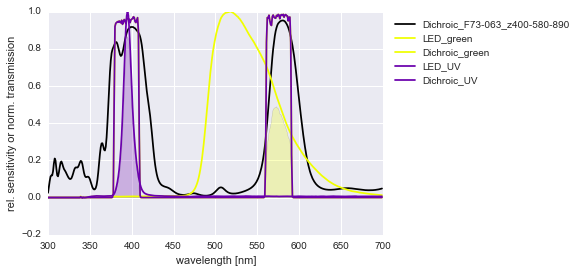

In [78]:
plt.plot(x_wavelen_nm, Dichr_Obj, color="black", label="Dichroic_" +Dichr_Obj_name)

for LED in LEDs:        
    if len(LED["spect"]) > 0:    
        colLED = csl.wavelength_to_rgb(LED["peak_nm"])
        plt.plot(x_wavelen_nm, LED["LED_spect"], color=colLED, label="LED_" +LED["name"])
        if len(LED["filter_spect"]) > 0:    
            plt.plot(x_wavelen_nm, LED["filter_spect"], color=colLED, label="Dichroic_" +LED["name"])
        plt.fill(x_wavelen_nm, LED["spect"], facecolor=colLED, alpha=0.25)    

sns.axlabel("wavelength [nm]", "rel. sensitivity or norm. transmission")     
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")

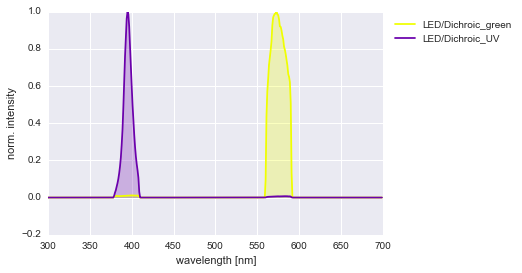

In [79]:
for LED in LEDs:        
    if len(LED["spect"]) > 0:    
        # Normalize the spectra of the LED/dichroic combinations
        #
        ymax          = np.amax(LED["spect"])
        LED["spect"] /= ymax
        
        # Plot spectra ...
        #
        colLED = csl.wavelength_to_rgb(LED["peak_nm"])
        plt.plot(x_wavelen_nm, LED["spect"], color=colLED, label="LED/Dichroic_" +LED["name"])    
        plt.fill(x_wavelen_nm, LED["spect"], facecolor=colLED, alpha=0.25)

sns.axlabel("wavelength [nm]", "norm. intensity")     
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")

### Define diameter of stimulus spot on detector:

In [80]:
r_spot_mm    = 0.250

# Calculate area of spot on the detector
#
A_detect_um2 = np.pi *(r_spot_mm *1E3)**2
print("Illuminated area is {0:.3e} µm2".format(A_detect_um2))

Illuminated area is 1.963e+05 µm2


# Calculation:


In [81]:
# If LED/filter spectra are not define, generate those from center 
# wavelength and band-pass width
#
for LED in LEDs:
    # Calculate overlap between each LED/filter and photoreceptor type
    #
    LED["effect_on_PR"] = []
    for PR in PRs:
        if len(PR["spect"]) > 0:
            temp = {}
            temp["PR_name"] = PR["name"]
            temp["spect"]   = PR["spect"] *LED["spect"]
            A_PR            = np.trapz(PR["spect"])
            A_overlap       = np.trapz(temp["spect"])
            A_LED           = np.trapz(LED["spect"]) 
            temp["rel_exc"] = A_overlap/A_LED
            """
            temp["rel_exc"] = A_overlap/A_PR
            """
            LED["effect_on_PR"].append(temp)


Relative co-excitation:
  19.8% of mouse M cone by green
   0.5% of mouse S cone by green
  11.1% of mouse M cone by UV
  35.9% of mouse S cone by UV


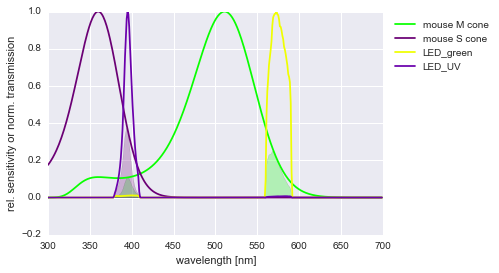

In [82]:
# Plot spectra of photoreceptors and LED/filter combinations
#
for PR in PRs:
    if len(PR["spect"]) > 0:
        plt.plot(x_wavelen_nm, PR["spect"], 
                 color=csl.wavelength_to_rgb(PR["peak_nm"]), label=PR["name"])
        
for LED in LEDs:        
    if len(LED["spect"]) > 0:    
        colLED = csl.wavelength_to_rgb(LED["peak_nm"])
        plt.plot(x_wavelen_nm, LED["spect"], color=colLED, label="LED_" +LED["name"])
        for effect in LED["effect_on_PR"]:
            for PR in PRs:
                if PR["name"] == effect["PR_name"]:
                    colPR = csl.wavelength_to_rgb(PR["peak_nm"])
            plt.fill(x_wavelen_nm, effect["spect"], facecolor=colPR, alpha=0.25)    

sns.axlabel("wavelength [nm]", "rel. sensitivity or norm. transmission")     
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")


"""
# ***********************
# ***********************
LEDs[0]["effect_on_PR"][0]["rel_exc"] = 0.166864675438927
LEDs[0]["effect_on_PR"][1]["rel_exc"] = 1.08647022352287E-08
LEDs[1]["effect_on_PR"][0]["rel_exc"] = 0.109573046335205
LEDs[1]["effect_on_PR"][1]["rel_exc"] = 0.273304491525736
# ***********************
# ***********************
"""

# Print co-excitation values for all LED/filter and photoreceptor combinations
#
print("Relative co-excitation:")
for LED in LEDs:        
    if len(LED["spect"]) > 0:    
        for effect in LED["effect_on_PR"]:
            print("{0:6.1f}% of {1} by {2}"
                  .format(effect["rel_exc"]*100, effect["PR_name"], LED["name"]))    

In [83]:
# Calculate photo-isomerization rates for all LED/filter and photoreceptor combinations
#
print("Photoisomerization rates:")

for LED in LEDs:
    # Convert energy flux from [nW] (=readout of photometer, in [nW]) into [eV/s]
    #
    LED["pow_eflux"] = LED["pow_meas_nW"] *1E-9 *eV_per_J

    # Calculate the wavelength-dependent photon energy `Q` in [eV]
    #
    LED["pow_Q"]     = c *h /(LED["peak_nm"] *1E-9)

    # Divide energy flux by the photon energy to get the photon flux `phi`[photons/s] 
    # and then photon flux density `E` [photons/s /µm^2]
    #
    LED["pow_phi"]   = LED["pow_eflux"] /LED["pow_Q"]
    LED["pow_E"]     = LED["pow_phi"] /A_detect_um2
    
    # Calculate per photoreceptor ...
    #
    for effect in LED["effect_on_PR"]:
        for PR in PRs:
            if PR["name"] == effect["PR_name"]:
                # ... photon flux per photoreceptor `photon_rate` in [photons/s]
                #
                A_collect = PR["collecArea_um2"]
                effect["photon_rate"]   = LED["pow_E"] *A_collect
                
                # ... photoisomerizations [P*/photoreceptor /s]
                #
                effect["photoiso_rate"] = effect["photon_rate"] *effect["rel_exc"]
                print("{0:5.1f} .. {1:5.1f} 10^3 photons/s in {2} for {3}"
                      .format(effect["photoiso_rate"][0]/1000.0, 
                              effect["photoiso_rate"][-1]/1000.0, PR["name"], LED["name"]))

Photoisomerization rates:
  0.0 ..  24.6 10^3 photons/s in mouse M cone for green
  0.0 ..   0.6 10^3 photons/s in mouse S cone for green
  0.0 ..   9.3 10^3 photons/s in mouse M cone for UV
  0.0 ..  30.1 10^3 photons/s in mouse S cone for UV


In [84]:
"""
for standard values of excel sheet ...
20.8 10^3 photons/s in mouse M cone for green
 0.0 10^3 photons/s in mouse S cone for green
 9.6 10^3 photons/s in mouse M cone for blue
23.8 10^3 photons/s in mouse S cone for blue
"""

'\nfor standard values of excel sheet ...\n20.8 10^3 photons/s in mouse M cone for green\n 0.0 10^3 photons/s in mouse S cone for green\n 9.6 10^3 photons/s in mouse M cone for blue\n23.8 10^3 photons/s in mouse S cone for blue\n'

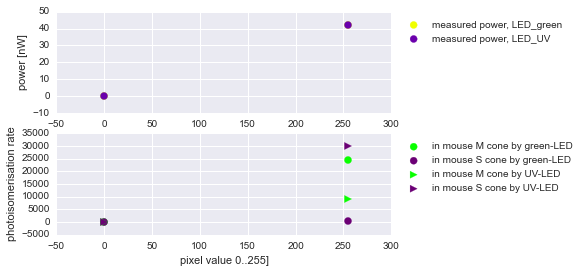

In [85]:
markers = ["o", ">", "<", "#"]

for iLED, LED in enumerate(LEDs):
    colLED = csl.wavelength_to_rgb(LED["peak_nm"])
    plt.subplot(2, 1, 1)
    sns.axlabel("pixel value 0..255]", "power [nW]")         
    plt.scatter(LED["levels"], LED["pow_meas_nW"], color=colLED, label="measured power, LED_" +LED["name"],
                marker="o", s=50)
    plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")

    plt.subplot(2, 1, 2)
    sns.axlabel("pixel value 0..255]", "photoisomerisation rate")         
    for iEffect, effect in enumerate(LED["effect_on_PR"]):
        for PR in PRs:
            if PR["name"] == effect["PR_name"]:
                if len(PR["spect"]) > 0:
                    colPR = csl.wavelength_to_rgb(PR["peak_nm"])
                    plt.scatter(LED["levels"], effect["photoiso_rate"], color=colPR, 
                                label="in " +PR["name"] +" by " +LED["name"] +"-LED",
                                marker=markers[iLED], s=50)
    plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")